## Project submitted by  Sreedhar Babu
# All the comments and inferances are placed below the cells after execution.ical plotting.


In [80]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'C:\\Users\\sreed\\OneDrive\\Desktop\\simpliLearn\\DSwithPython\\Project\\proj2\\AusApparalSales4thQrt2020.csv'

In [3]:
df=pd.read_csv(path)
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [19]:
df.tail()

,Date,Time,State,Group,Unit,Sales,Normalized_Sales
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000,0.190476
7556,30-Dec-2020,Evening,TAS,Kids,15,37500,0.206349
7557,30-Dec-2020,Evening,TAS,Men,15,37500,0.206349
7558,30-Dec-2020,Evening,TAS,Women,11,27500,0.142857
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500,0.174603


In [25]:
df.nunique()

Date                90
Time                 3
State                7
Group                4
Unit                64
Sales               64
Normalized_Sales    64
dtype: int64

The data consists of 7560 sales records of 90 Days, across time of the day(morning, Afternoon,evening), in 7 States, covering 4 groups  of customers(Kids, Women, Men, Seniors) as units with details of sales.

1)	Determine the states that are generating the highest revenues 

In [5]:
###  1)	Determine the states that are generating the highest revenues 

### States are listed based on their total sales / reveneus
revenues_statevise=df.groupby(['State']).agg({'Sales':'sum'})
revenues_statevise.sort_values(['Sales'],ascending=False)                                                                       

,Sales
State,
VIC,105565000
NSW,74970000
SA,58857500
QLD,33417500
TAS,22760000
NT,22580000
WA,22152500


States VIC,NSW, SA are generating the highest revenues.
The states TAS, NT and WA are generating the lowest revenues and need to be focussed on.

1.	Data Wrangling
●	Ensure that the data is clean and that there is no missing or incorrect data.
Using time as index

In [6]:
df.nunique()

Date     90
Time      3
State     7
Group     4
Unit     64
Sales    64
dtype: int64

In [7]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [8]:
# 1.	Data Wrangling a) missing values...
df.isna().sum()
#Result : No missing values :df.describe()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [9]:
# 1.	Data Wrangling a) missing values...
df.notna().sum()
#Result : the data is clean and there is no missing or incorrect data.

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

1.	Data Wrangling
●	Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them). No missing data.


1.	Data Wrangling
●	Select an appropriate Data Wrangling approach —  data standardization or data normalization. Perform the standardization or normalization and present the data.(Normalization is the preferred approach for this problem.)

In [10]:
df['Normalized_Sales'] = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max()-df['Sales'].min())
df.head()

,Date,Time,State,Group,Unit,Sales,Normalized_Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000,0.095238
1,1-Oct-2020,Morning,WA,Men,8,20000,0.095238
2,1-Oct-2020,Morning,WA,Women,4,10000,0.031746
3,1-Oct-2020,Morning,WA,Seniors,15,37500,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,0.015873


In [37]:
df.groupby(['Time']).max()

,Date,State,Group,Unit,Sales,Normalized_Sales
Time,,,,,,
Afternoon,9-Oct-2020,WA,Women,65,162500,1.0
Evening,9-Oct-2020,WA,Women,65,162500,1.0
Morning,9-Oct-2020,WA,Women,65,162500,1.0


In [27]:
df.groupby(['Time']).min()

,Date,State,Group,Unit,Sales,Normalized_Sales
Time,,,,,,
Afternoon,1-Dec-2020,NSW,Kids,2,5000,0.0
Evening,1-Dec-2020,NSW,Kids,2,5000,0.0
Morning,1-Dec-2020,NSW,Kids,2,5000,0.0


The maximum sales are happening during afternoons. Minimum sales are in the morning in October month in WA state
The minimum sales are in dec at NSW state.
As mornings they will be busy, nothing much can improved on mornings. 
The shops can delay openings with early lunch of employees.
Lunch times to be preponed as afternoons are most revenue generating.
Maximum the sales during entire day are done by women.
so the women group is needed to be more focussed at and new items of women to be introduced.

In [30]:
df.groupby(['State']).agg({'Sales':'max'}).sort_values(by='Sales',ascending=False)

,Sales
State,
VIC,162500
NSW,112500
SA,87500
QLD,62500
NT,37500
TAS,37500
WA,37500


In [31]:
df.groupby(['State']).agg({'Sales':'min'}).sort_values(by='Sales',ascending=True)

,Sales
State,
NT,5000
TAS,5000
WA,5000
QLD,7500
SA,25000
NSW,30000
VIC,50000


In [34]:
df.groupby(['State']).agg({'Sales':'max'}).sort_values(by='Sales',ascending=False)

,Sales
State,
VIC,162500
NSW,112500
SA,87500
QLD,62500
NT,37500
TAS,37500
WA,37500


In [39]:
df.groupby(['Group']).agg({'Sales':'sum'}).sort_values(by='Sales',ascending=False)

,Sales
Group,
Men,85750000
Women,85442500
Kids,85072500
Seniors,84037500


The overall Sales is nearly same acros the groups. Further statistical analysis can be used to get into more insigths 

2.	Data Analysis
●	Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.). 
●	Determine which group is generating the highest sales, and which group is generating the lowest sales.
●	Determine which state is generating the highest sales, and which state is generating the lowest sales.
●	Generate weekly, monthly and quarterly reports for the analysis made.
(Use suitable libraries such as NumPy, Pandas, SciPy etc. for performing the analysis.)

In [45]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)

In [46]:
df.head()

,Time,State,Group,Unit,Sales,Normalized_Sales
Date,,,,,,
2020-10-01,Morning,WA,Kids,8,20000,0.095238
2020-10-01,Morning,WA,Men,8,20000,0.095238
2020-10-01,Morning,WA,Women,4,10000,0.031746
2020-10-01,Morning,WA,Seniors,15,37500,0.206349
2020-10-01,Afternoon,WA,Kids,3,7500,0.015873


In [52]:
df.describe()

,Unit,Sales,Normalized_Sales
count,7560.000000,7560.000000,7560.000000
mean,18.005423,45013.558201,0.254054
std,12.901403,32253.506944,0.204784
min,2.000000,5000.000000,0.000000
25%,8.000000,20000.000000,0.095238
50%,14.000000,35000.000000,0.190476
75%,26.000000,65000.000000,0.380952
max,65.000000,162500.000000,1.000000


Inferances from describe function :
Unit Column
1.Units mean is at 18 with standard deviation 12.9. The inter quartile range is (26-8=18). 
2. The outliers for unit data can be identified outside 1.5 times of IQR = 27
Sales Column
1.Sales mean is at 45000 with standard deviation 32253. The inter quartile range is (65000-20000)*1.5=67500). 
2. The outliers for unit data can be identified outside 1.5 times of IQR = 27

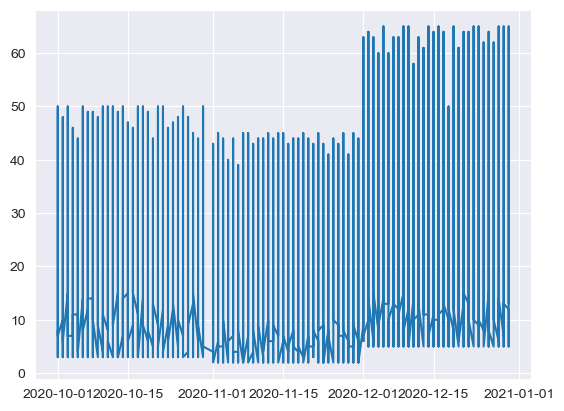

In [105]:
plt.plot(df['Unit'])

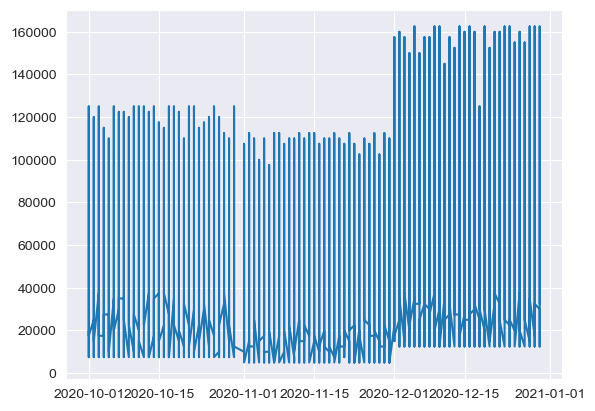

In [106]:
plt.plot(df['Sales'])

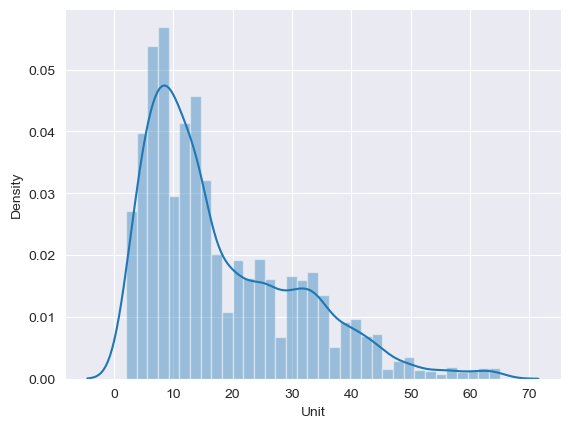

In [50]:
sns.distplot(df['Unit'])
plt.show()

Units is plotted above. Units have a mean at 10 and right skewed.

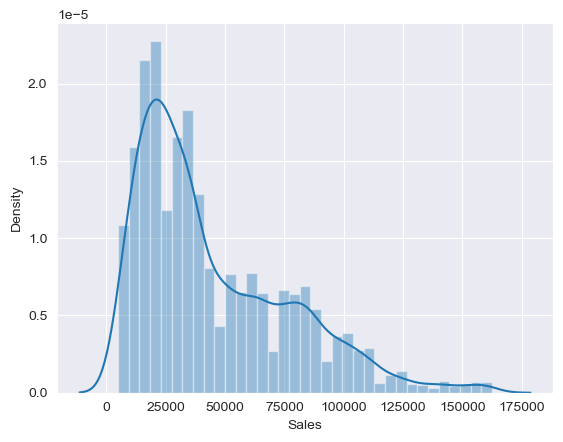

In [51]:
sns.distplot(df['Sales'])
plt.show()

Sales also followed similar distribution to Units is plotted above. Sales have a mean at 25000 and right skewed.

WEEKLY Data analysis

In [73]:
wdfu=df.Unit.resample('w').mean()
wdfs=df.Sales.resample('w').mean()

In [85]:
wdfu=pd.DataFrame(wdfu)
wdfs=pd.DataFrame(wdfs)

In [94]:
wdfu.describe()

,Unit
count,14.000000
mean,18.154074
std,2.904944
min,14.193878
25%,15.284793
50%,18.181973
75%,21.122024
max,21.892857


In [95]:
wdfs.describe()

,Sales
count,14.000000
mean,45385.183835
std,7262.360668
min,35484.693878
25%,38211.982710
50%,45454.931973
75%,52805.059524
max,54732.142857


##

<BarContainer object of 14 artists>

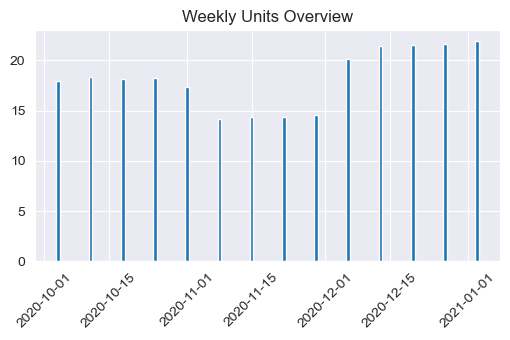

In [90]:
plt.figure(figsize=(6,3),dpi=100)
plt.tick_params(axis='x',rotation=45)
plt.title('Weekly Units Overview')
plt.bar(wdfu.index,height=wdfu.Unit)

<BarContainer object of 14 artists>

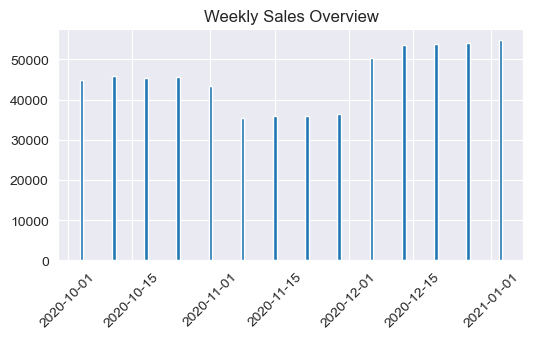

In [92]:
plt.figure(figsize=(6,3),dpi=100)
plt.tick_params(axis='x',rotation=45)
plt.title('Weekly Sales Overview')
plt.bar(wdfs.index,height=wdfs.Sales)

### Weekly sales and Units are showing similar trends. it implies that the Sales per unit is constant. 
### Also Unit Sales have started good during Oct, dipped in Nov, but regained in dec and continued in Jan.

### Monthly Analysis of Data

In [93]:
mdfu=df.Unit.resample('m').mean()
mdfs=df.Sales.resample('m').mean()
mdfu=pd.DataFrame(mdfu)
mdfs=pd.DataFrame(mdfs)

In [96]:
mdfu.describe()

,Unit
count,3.000000
mean,18.005423
std,3.545405
min,14.394048
25%,16.267659
50%,18.141270
75%,19.811111
max,21.480952


In [97]:
wdfs.describe()

,Sales
count,14.000000
mean,45385.183835
std,7262.360668
min,35484.693878
25%,38211.982710
50%,45454.931973
75%,52805.059524
max,54732.142857


<BarContainer object of 3 artists>

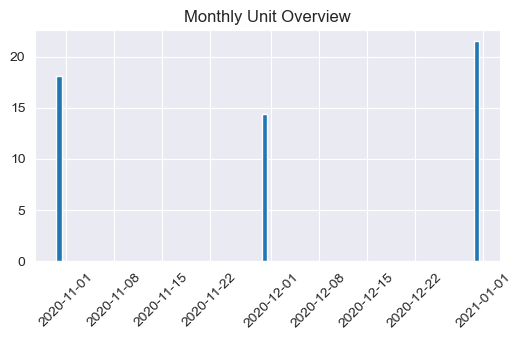

In [100]:
plt.figure(figsize=(6,3),dpi=100)
plt.tick_params(axis='x',rotation=45)
plt.title('Monthly Unit Overview')
plt.bar(mdfu.index,height=mdfu.Unit)

<BarContainer object of 3 artists>

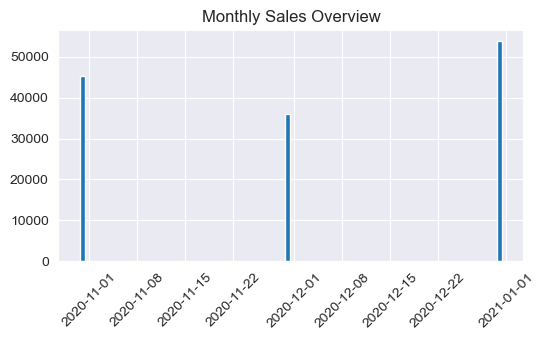

In [102]:
plt.figure(figsize=(6,3),dpi=100)
plt.tick_params(axis='x',rotation=45)
plt.title('Monthly Sales Overview')
plt.bar(mdfs.index,height=mdfs.Sales)

## Monthly Unit sales from above figures is evident that  the sales are good in nov, poor in dec and better in Jan.
### To get better understanding of data , the category columns are coverted to numerals. 
### To confirm the outliers are not there, the Sales and Unit colums are winsoried and from below it is confirmed.

In [115]:
from scipy.stats.mstats import winsorize

df['Winsoried_Sales'] = winsorize(df['Sales'], limits = [0.05,0.05])
df['Winsoried_Unit'] = winsorize(df['Unit'], limits = [0.05,0.05])
df

,Time,State,Group,Unit,Sales,Normalized_Sales,Winsoried_Sales,Winsoried_Unit
Date,,,,,,,,
2020-10-01,Morning,WA,Kids,8,20000,0.095238,20000,8
2020-10-01,Morning,WA,Men,8,20000,0.095238,20000,8
2020-10-01,Morning,WA,Women,4,10000,0.031746,10000,4
2020-10-01,Morning,WA,Seniors,15,37500,0.206349,37500,15
2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,10000,4
...,...,...,...,...,...,...,...,...
2020-12-30,Afternoon,TAS,Seniors,14,35000,0.190476,35000,14
2020-12-30,Evening,TAS,Kids,15,37500,0.206349,37500,15
2020-12-30,Evening,TAS,Men,15,37500,0.206349,37500,15


## For further analysis labels are converted to integers to facilitate further analysis

In [118]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for the 'Time' column 

label_encoder = LabelEncoder()
df['Time_encoded'] = label_encoder.fit_transform(df['Time'])
df['State_encoded'] = label_encoder.fit_transform(df['State'])
df['Group_encoded'] = label_encoder.fit_transform(df['Group'])
df.head()


,Time,State,Group,Unit,Sales,Normalized_Sales,Winsoried_Sales,Winsoried_Unit,Time_encoded,State_encoded,Group_encoded
Date,,,,,,,,,,,
2020-10-01,Morning,WA,Kids,8,20000,0.095238,20000,8,2,6,0
2020-10-01,Morning,WA,Men,8,20000,0.095238,20000,8,2,6,1
2020-10-01,Morning,WA,Women,4,10000,0.031746,10000,4,2,6,3
2020-10-01,Morning,WA,Seniors,15,37500,0.206349,37500,15,2,6,2
2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,10000,4,0,6,0


In [133]:
dfc=df[['Time_encoded','State_encoded','Group_encoded','Unit','Sales']].copy()

In [134]:
dfc.head()

,Time_encoded,State_encoded,Group_encoded,Unit,Sales
Date,,,,,
2020-10-01,2,6,0,8,20000
2020-10-01,2,6,1,8,20000
2020-10-01,2,6,3,4,10000
2020-10-01,2,6,2,15,37500
2020-10-01,0,6,0,3,7500


In [136]:
dfc.corr()

,Time_encoded,State_encoded,Group_encoded,Unit,Sales
Time_encoded,1.000000e+00,-3.003558e-18,5.743231e-18,0.001005,0.001005
State_encoded,-3.003558e-18,1.000000e+00,-3.599018e-18,-0.006439,-0.006439
Group_encoded,5.743231e-18,-3.599018e-18,1.000000e+00,-0.001105,-0.001105
Unit,1.004629e-03,-6.439166e-03,-1.105101e-03,1.000000,1.000000
Sales,1.004629e-03,-6.439166e-03,-1.105101e-03,1.000000,1.000000


## The correlation matrix also has no significant off diagnal terms. Hence all the factors are uncorrelated.